#1> You have to create a function that receives a list of numbers like [23,14,13,56,78,98,12] and returns it's Interquartile range(IQR)

Note: You have to code the logic from scratch

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:

def iqr(k,result= []):
 k.sort()
 l=k
 if len(l)%2==0:
  l1=l[0:(len(l)//2+1)]
  med1=l1[(len(l1)//2)+1]
  l2=l[(len(l)//2+1):]
  med2=l2[(len(l2)//2)+1]
 else:
  l1=l[0:(len(l)//2)]
  med1=l1[(len(l1)//2)+1]
  l2=l[(len(l)//2):]
  med2=l2[(len(l2)//2)+1]
    
 return(med2-med1)


In [136]:
iqr([1,2,8,7,3,4,5,6,9,10])

5

# 2> Plot a histogram for total team scores for all IPL games.

Note: Per match 2 teams will play hence total number scores would be = no. of matches * 2

In [150]:
data=pd.read_csv('deliveries.csv')

In [151]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


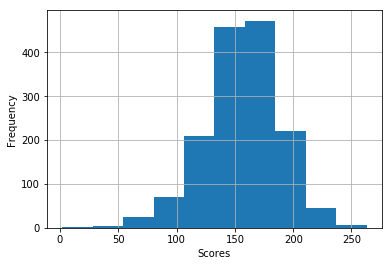

In [168]:
matches=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')
team_scores=delivery.groupby(['match_id','batting_team']).sum()['total_runs'].reset_index()  
team_scores['total_runs'].hist()  
plt.xlabel('Scores')
plt.ylabel('Frequency')

plt.show()

# Find the skewness of bowler economy data where the bowler has bowled a minimum of 300 balls.

Note : if you don't know about economy read this https://en.wikipedia.org/wiki/Economy_rate_(cricket)

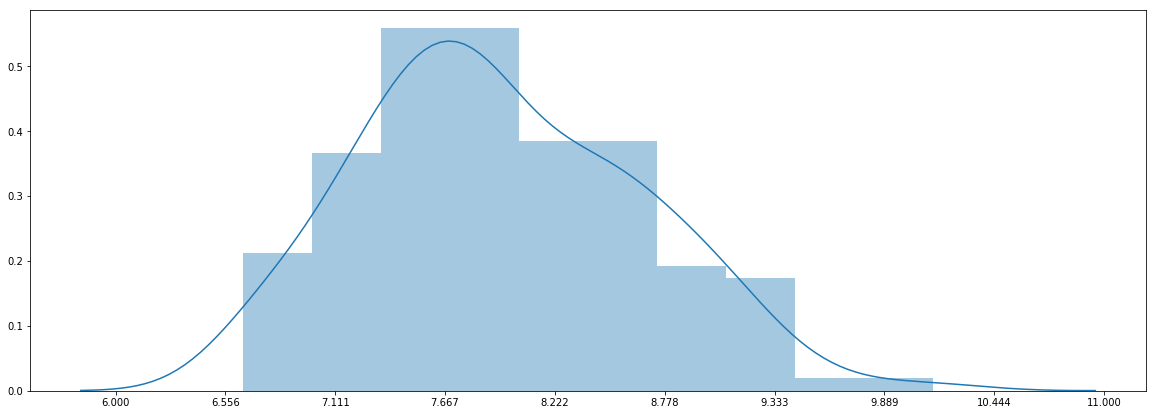

In [175]:
balls_played=delivery['bowler'].value_counts()    
balls_played=balls_played[balls_played>300]     

bowlers=delivery[delivery['bowler'].isin(balls_played.index)]   
economy=(bowlers.groupby('bowler').sum()['total_runs']/balls_played*6).sort_values()   
plt.subplots(figsize=(20,7))
sns.distplot(economy) 
plt.xticks(np.linspace(6,11,10))
plt.show()